Dataset Analysis
----------------
Total number of images: 355
Number of images in each category:
Modhealthy: 33
Modinoculated: 51
Reshealthy: 21
Resinoculated: 38
Suschealthy: 77
Suscinoculated: 135
Image formats found in the dataset: {'JPEG'}


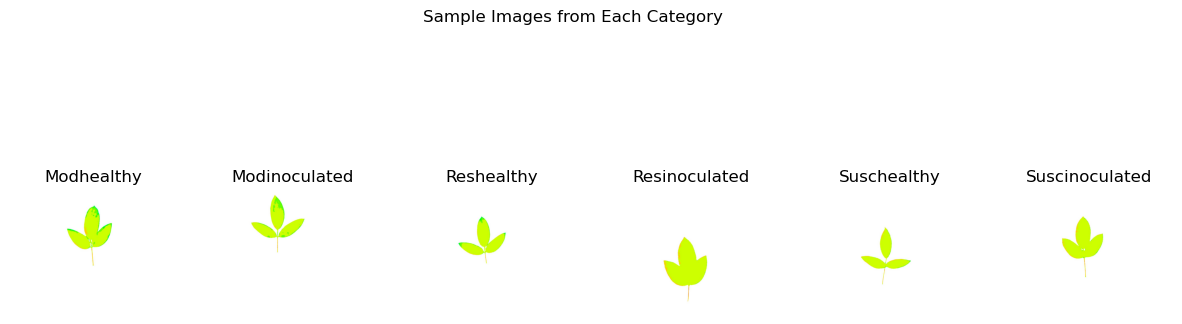

In [3]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import shutil
# Constants
DATA_FOLDER = 'data'  # Folder containing the dataset

def analyze_dataset(folder_path):
    """
    Analyzes the dataset by counting the number of images in each category,
    checking their format, and displaying one image from each category.
    """
    category_counts = Counter()
    image_format = set()
    sample_images = {}

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            for image in os.listdir(category_path):
                image_path = os.path.join(category_path, image)
                try:
                    with Image.open(image_path) as img:
                        image_format.add(img.format)
                        category_counts[category] += 1

                        # Save the first image path from each category for display
                        if category not in sample_images:
                            sample_images[category] = image_path
                except IOError:
                    print(f"Error opening {image_path}")

    return category_counts, image_format, sample_images

def display_sample_images(sample_images):
    """
    Displays one image from each category.
    """
    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
    fig.suptitle('Sample Images from Each Category')

    for ax, (category, image_path) in zip(axes, sample_images.items()):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(category)

    plt.show()

def main():
    category_counts, image_format, sample_images = analyze_dataset(DATA_FOLDER)
    total_images = sum(category_counts.values())

    print("Dataset Analysis")
    print("----------------")
    print(f"Total number of images: {total_images}")
    print("Number of images in each category:")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    print(f"Image formats found in the dataset: {image_format}")

    # Display sample images
    display_sample_images(sample_images)

if __name__ == "__main__":
    main()


Identified Noisy Images: {'Modhealthy': ['FWH_4-2203.jpg', 'FWH_8-2203.jpg', 'FWH_9-2203.jpg'], 'Modinoculated': ['FWI_4-2203.jpg', 'FWI_8-1244.jpg', 'FWI_9-1249.jpg'], 'Reshealthy': ['FWH_2-2209.jpg', 'FWH_7-2205.jpg'], 'Resinoculated': ['FWI_2-2203.jpg', 'FWI_7-2209.jpg'], 'Suschealthy': ['FWH_1-1244.jpg', 'FWH_10-1244.jpg', 'FWH_11-2209.jpg', 'FWH_12-1249.jpg', 'FWH_3-1249.jpg', 'FWH_5-2203.jpg', 'FWH_6-2203.jpg'], 'Suscinoculated': ['FWI_1-2203.jpg', 'FWI_10-2203.jpg', 'FWI_11-2203.jpg', 'FWI_12-2203.jpg', 'FWI_3-2203.jpg', 'FWI_5-2205.jpg', 'FWI_6-2203.jpg']}


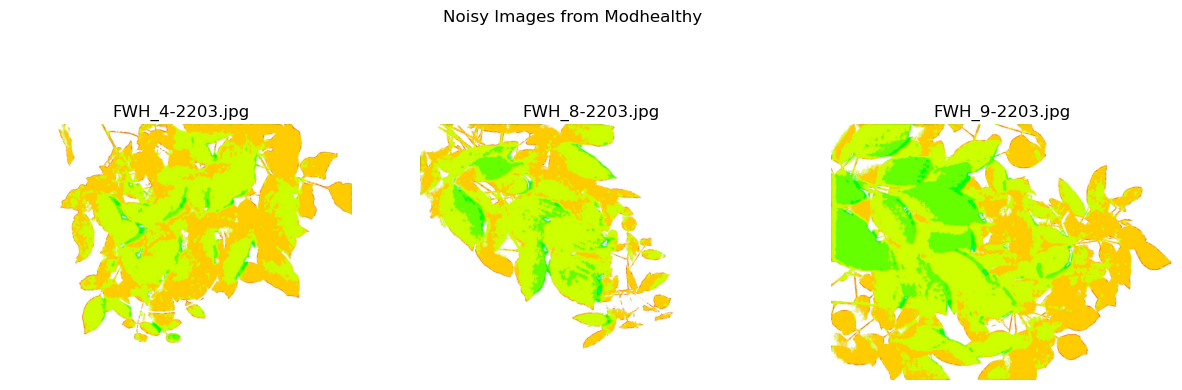

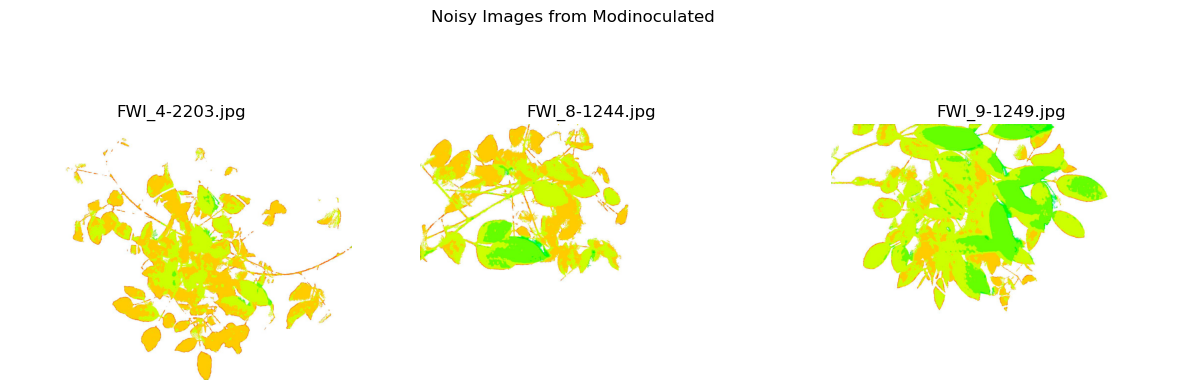

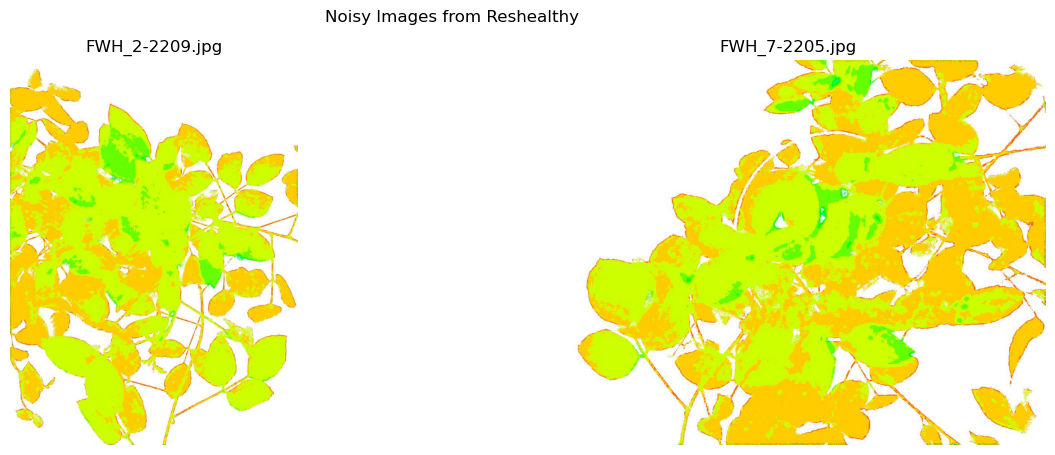

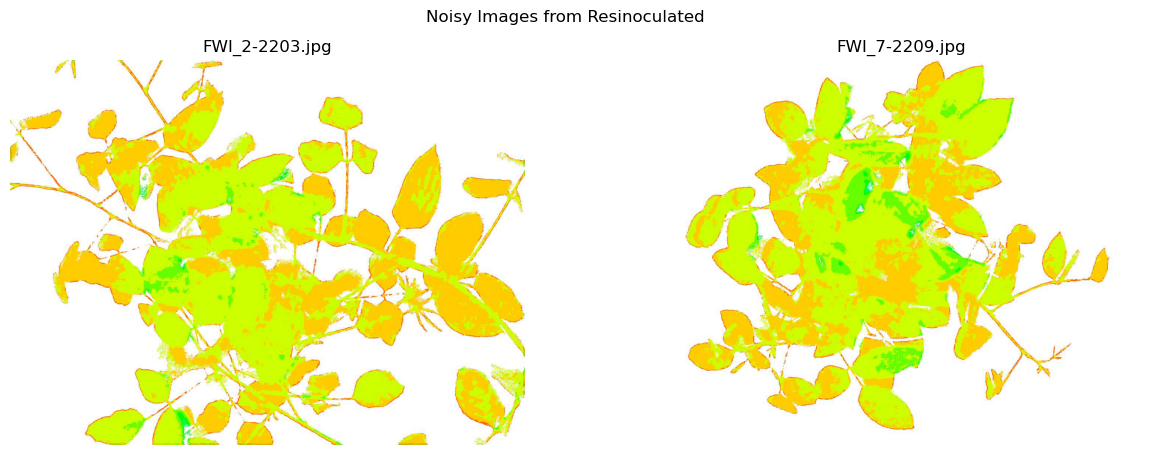

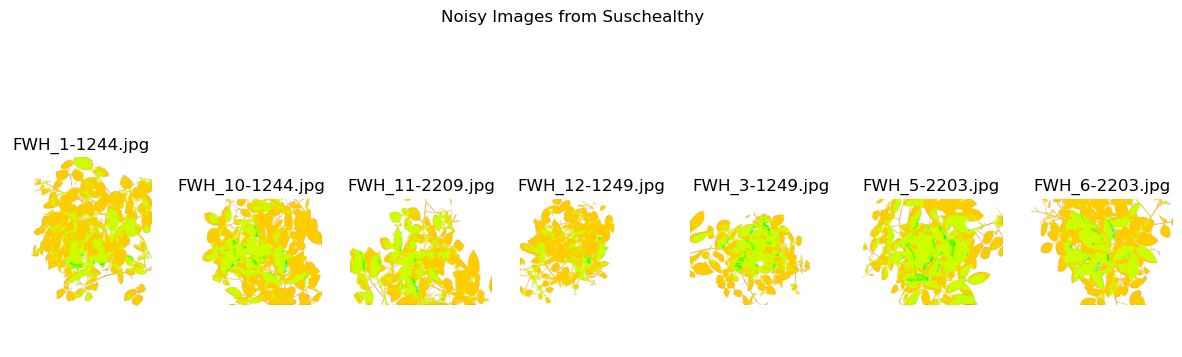

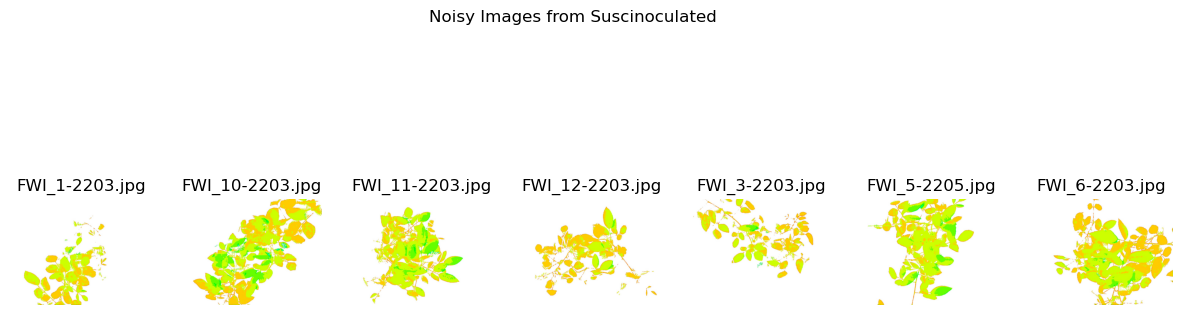

Cleaned dataset saved to cleaned_data
Re-Analyzed Dataset (Cleaned)
-----------------------------
Total number of images: 331
Number of images in each category:
Modhealthy: 30
Modinoculated: 48
Reshealthy: 19
Resinoculated: 36
Suschealthy: 70
Suscinoculated: 128
Image formats found in the dataset: {'JPEG'}


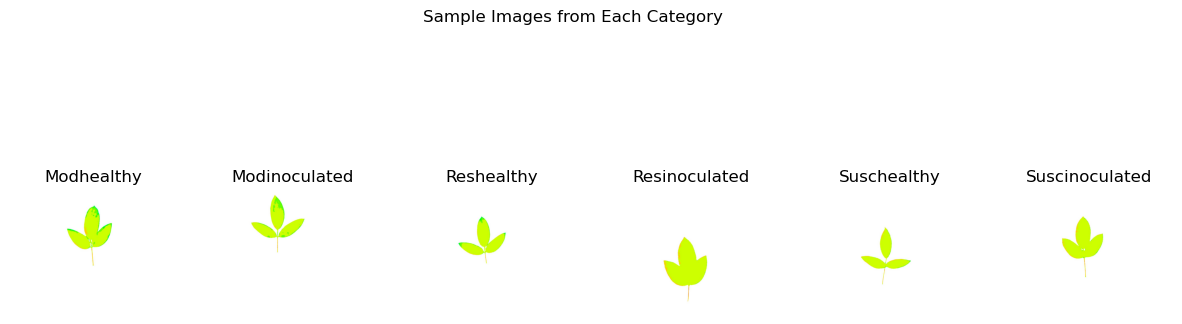

In [4]:
CLEANED_DATA_FOLDER = 'cleaned_data'  # Folder to save the cleaned dataset

#Function to Identify Noisy Images
def identify_noisy_images(folder_path, noisy_prefixes=('FWI', 'FWH')):
    """
    Identifies noisy images in the dataset whose names start with specified prefixes.
    """
    noisy_images = {}
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):
            noisy_images[category] = [
                image for image in os.listdir(category_path) if image.startswith(noisy_prefixes)
            ]
    return noisy_images

#Function to Display Noisy Images
def display_noisy_images(folder_path, noisy_images):
    """
    Displays the identified noisy images from each category.
    """
    for category, images in noisy_images.items():
        fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
        fig.suptitle(f'Noisy Images from {category}')

        for ax, image in zip(axes, images):
            img_path = os.path.join(folder_path, category, image)
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(image)

        plt.show()
        
#Function to Remove Noisy Images and Save Cleaned Dataset
def remove_noisy_images(src_folder, dest_folder, noisy_images):
    """
    Removes noisy images from the dataset and saves the cleaned dataset to a new folder.
    """
    for category in os.listdir(src_folder):
        src_category_path = os.path.join(src_folder, category)
        dest_category_path = os.path.join(dest_folder, category)
        
        if os.path.isdir(src_category_path):
            os.makedirs(dest_category_path, exist_ok=True)
            
            for image in os.listdir(src_category_path):
                src_image_path = os.path.join(src_category_path, image)
                dest_image_path = os.path.join(dest_category_path, image)

                # Copy only if the image is not identified as noisy
                if image not in noisy_images.get(category, []):
                    shutil.copy2(src_image_path, dest_image_path)
                    
#Main Function to Execute All Steps
def main():
    # Step 1: Identify Noisy Images
    noisy_images = identify_noisy_images(DATA_FOLDER)
    print("Identified Noisy Images:", noisy_images)

    # Step 2: Display Noisy Images
    display_noisy_images(DATA_FOLDER, noisy_images)

    # Step 3: Remove Noisy Images and Save Cleaned Dataset
    remove_noisy_images(DATA_FOLDER, CLEANED_DATA_FOLDER, noisy_images)
    print(f"Cleaned dataset saved to {CLEANED_DATA_FOLDER}")

    # Step 4: Re-Analyze the Cleaned Dataset
    category_counts, image_format, sample_images = analyze_dataset(CLEANED_DATA_FOLDER)
    print("Re-Analyzed Dataset (Cleaned)")
    print("-----------------------------")
    print(f"Total number of images: {sum(category_counts.values())}")
    print("Number of images in each category:")
    for category, count in category_counts.items():
        print(f"{category}: {count}")
    print(f"Image formats found in the dataset: {image_format}")

    # Optional: Display sample images from the cleaned dataset
    display_sample_images(sample_images)

if __name__ == "__main__":
    main()